# Heart Disease Problem

In this notebook, we investigate and make predictions on heart disease using the Heart Disease UCI Dataset, which comprises 13 attributes. The target variable signifies the existence of heart disease (0 = absence of disease, 1 = presence of disease).

The model we are going to use to is `Lasso` from Scikit-Learn Linear Model family.

Attribute information
* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.neighbors import LocalOutlierFactor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
path = r'./data/heart.csv'
df = pd.read_csv(path)

### Data Exploration

Let's explore the dataset to gain insights and understand the data.

In [3]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [6]:
df.shape

(1025, 14)

In [4]:
df.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


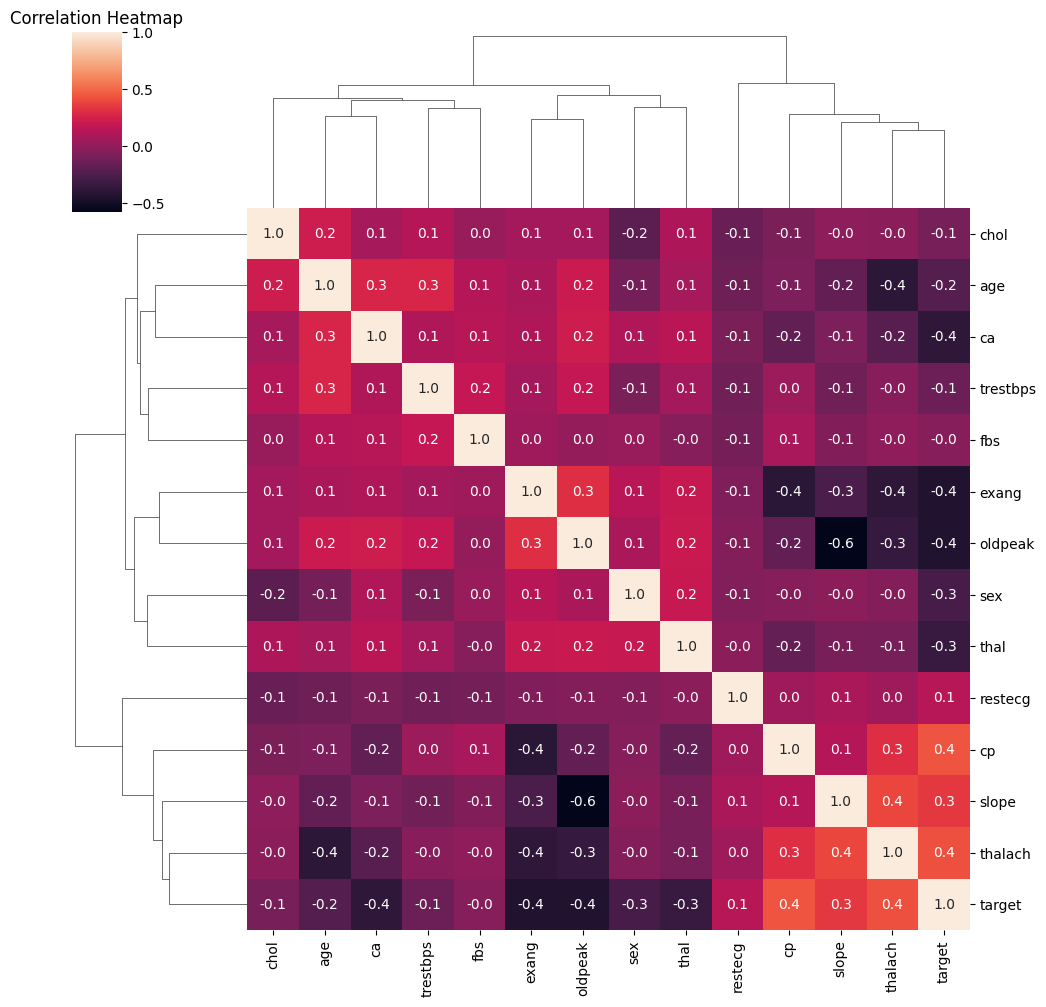

In [7]:
sns.clustermap(df.corr(), annot=True, fmt='.1f')
plt.title("Correlation Heatmap")
plt.show()

### Kernel Density Estimation (KDE) Plot

Examine the distribution of the data.

f:\VSCode Projects\Logistic-Regression-Problem-Heart-Disease\Logistic-Regression-Problem-Heart-Disease\.venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


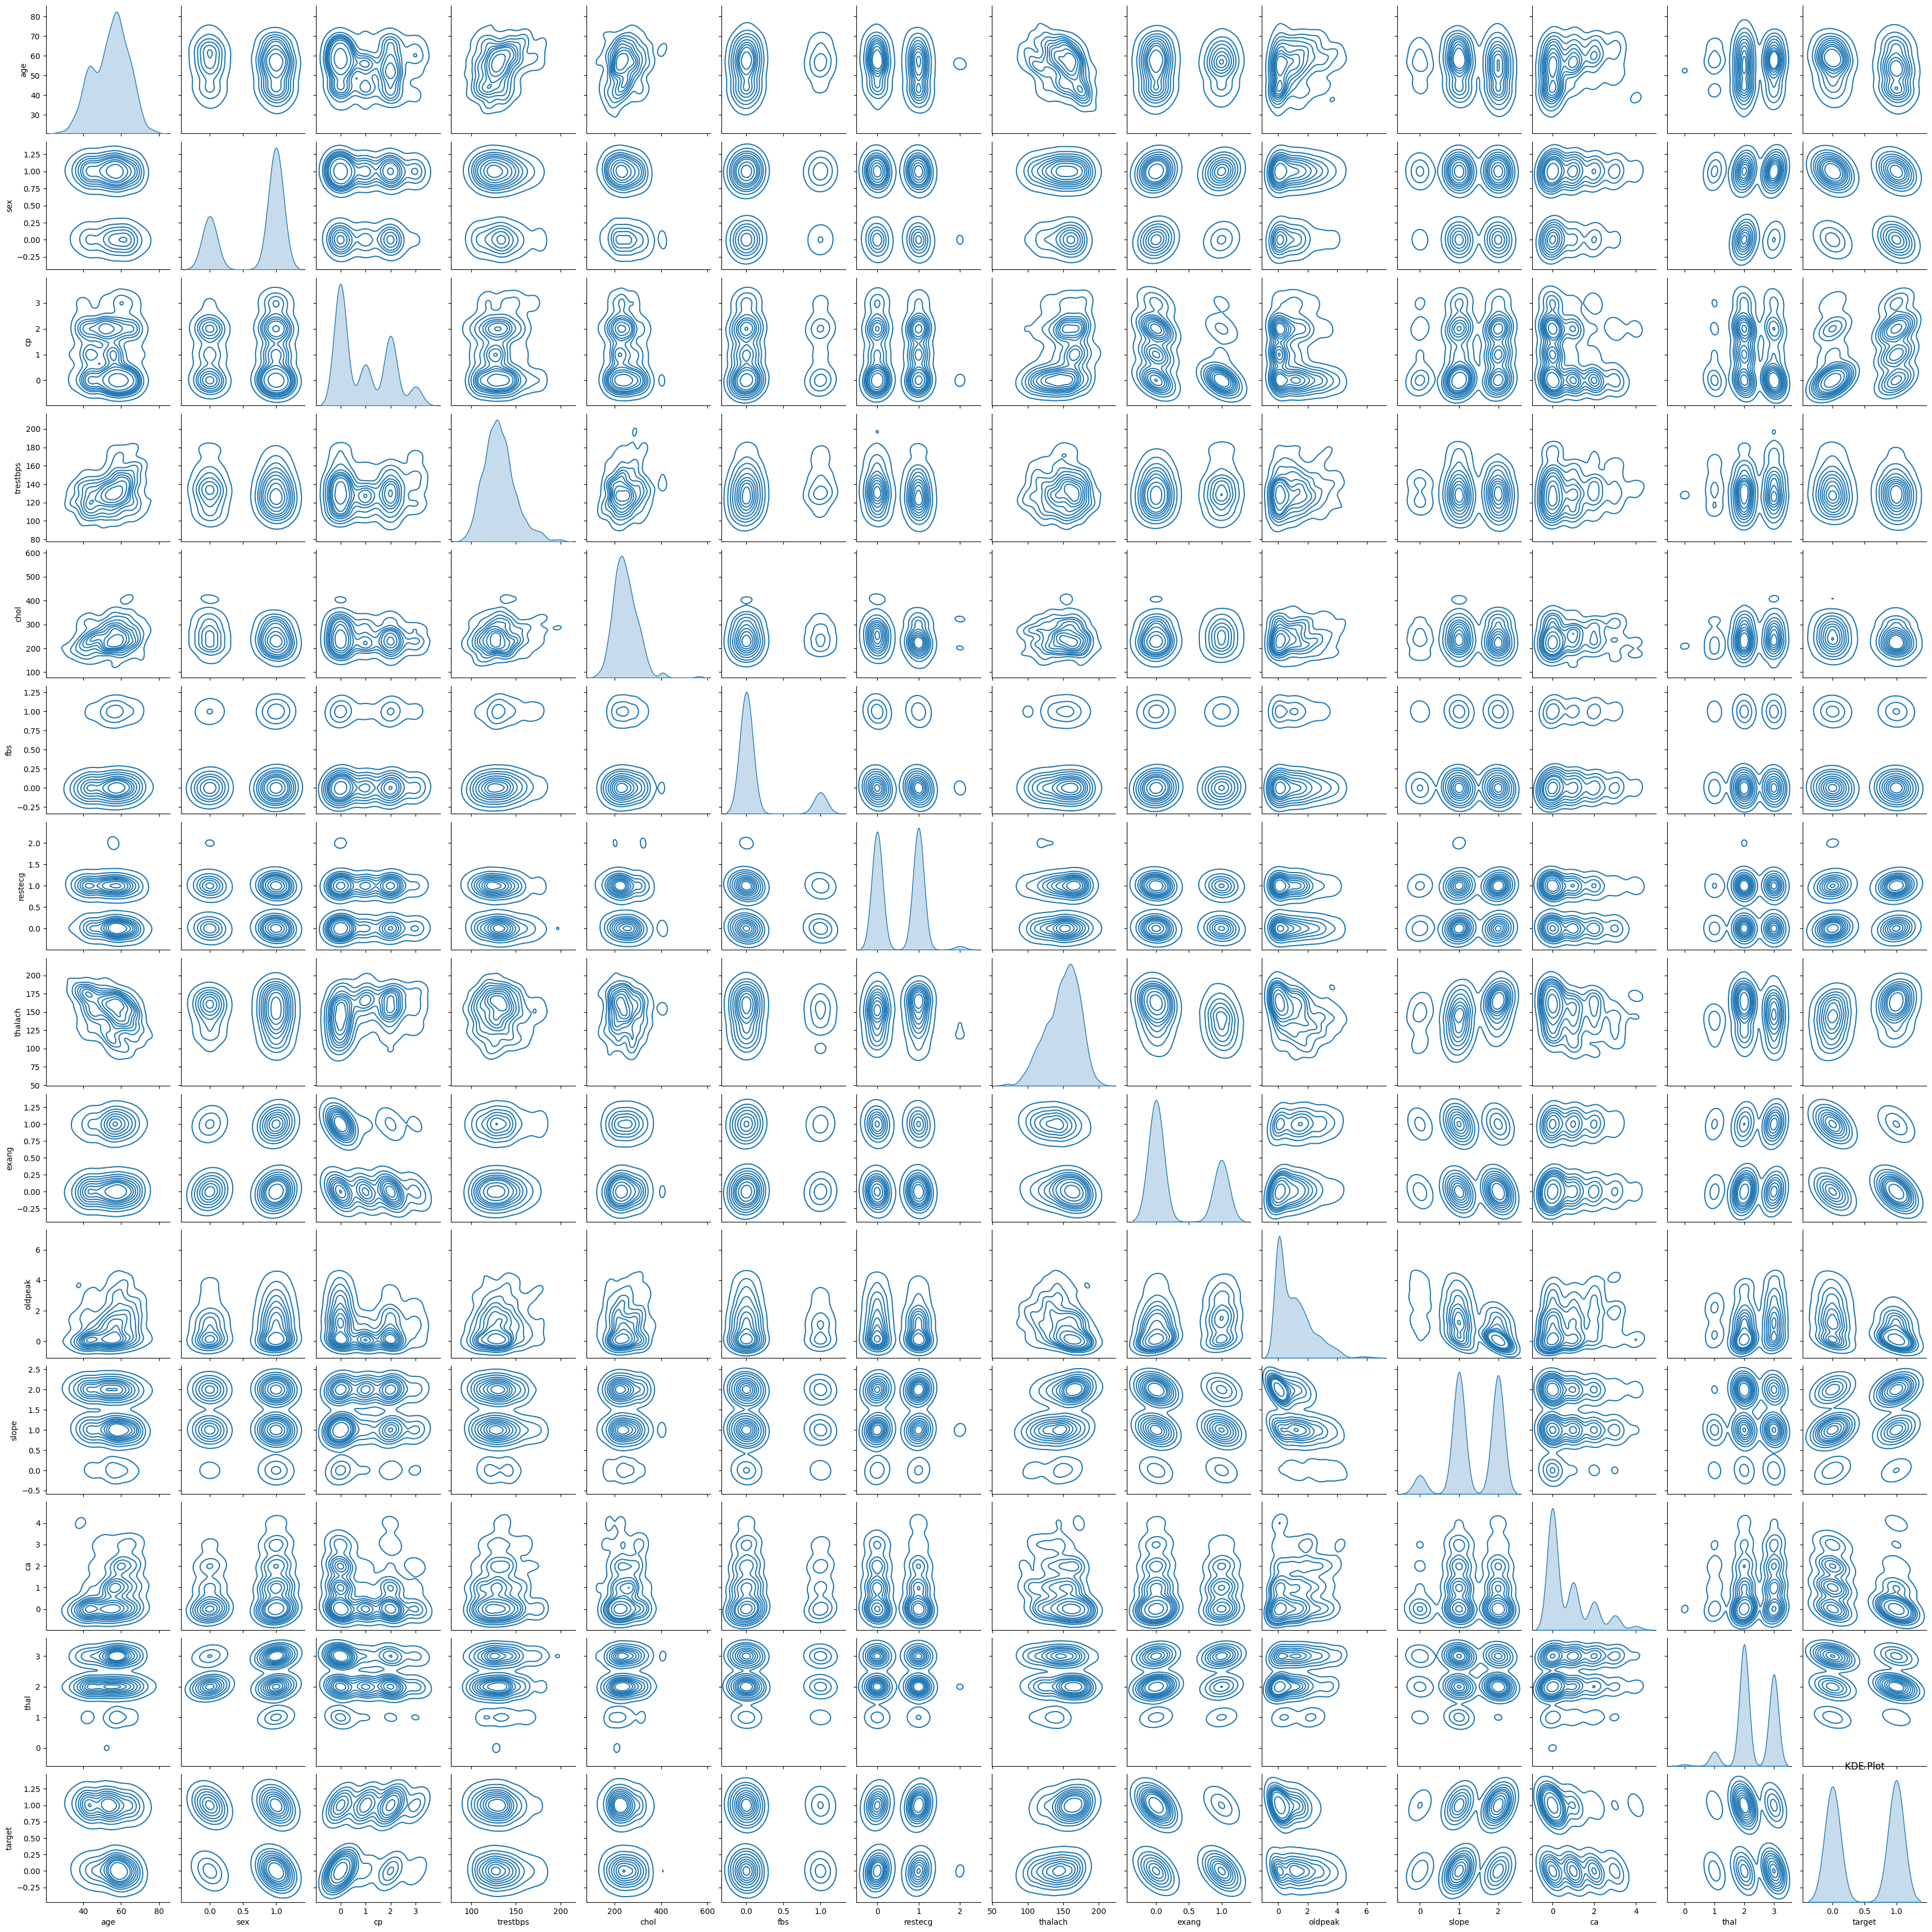

In [8]:
sns.pairplot(df, kind="kde")
plt.title("KDE Plot")
plt.show()

### Box Plot

Visualize the distribution of each feature using boxplots.

In [10]:
len(df.columns)

14

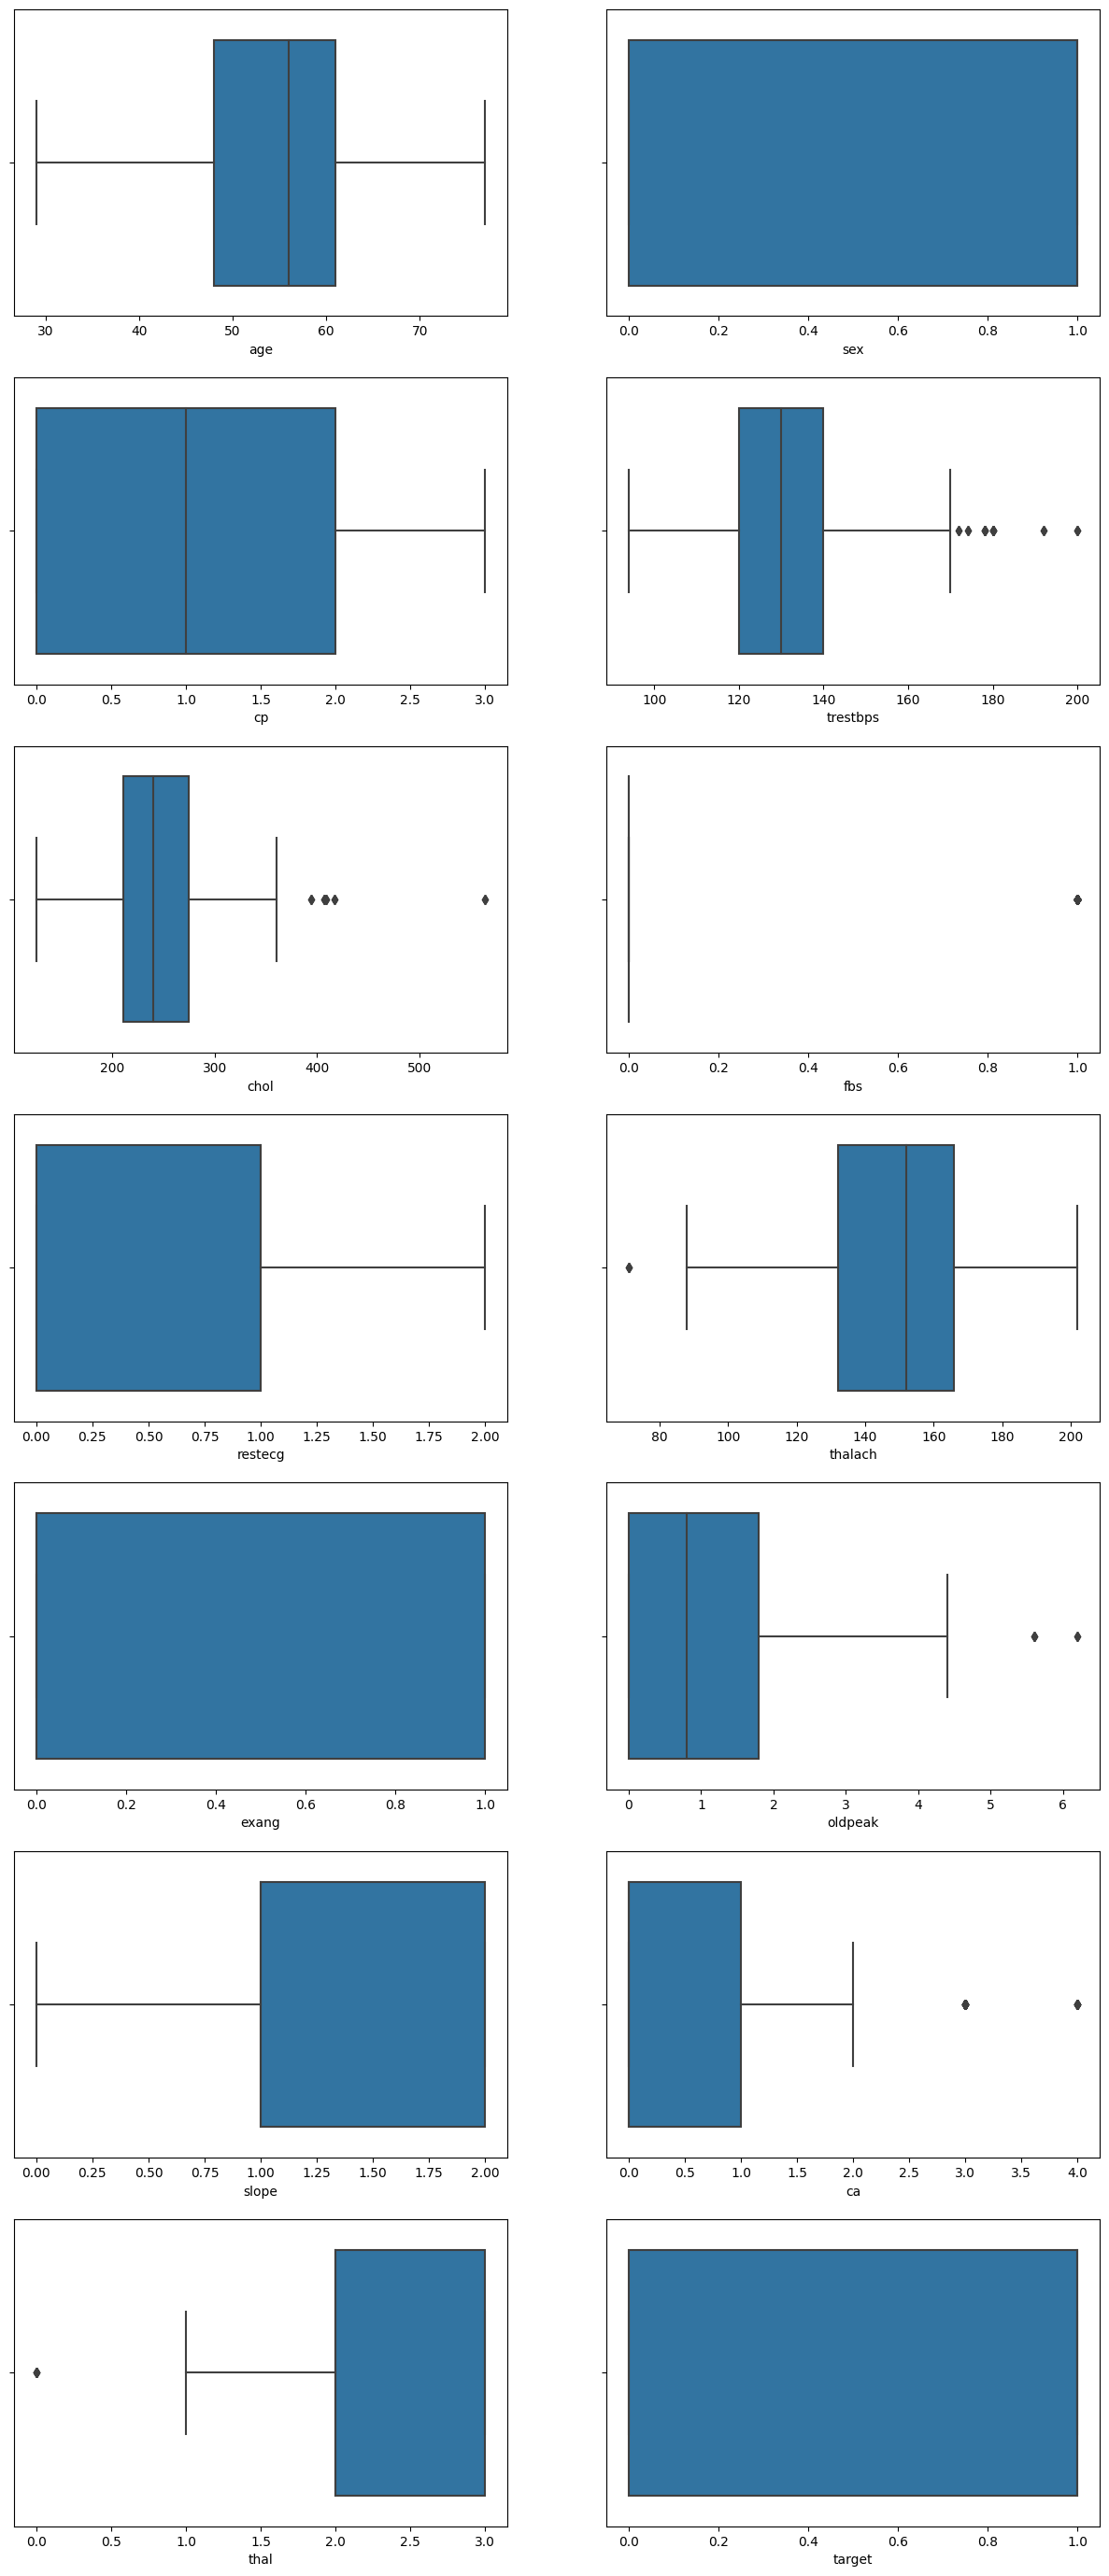

In [40]:
features = df.drop('target', axis=1)
features_list = df.columns.tolist()
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(15, 35))

for i, var in enumerate(features_list):
    x = i // 2
    y = i % 2
    sns.boxplot(data=df, x=var, ax=ax[x, y])
plt.show()

### Prepare Data for Modeling

Split the dataset into training features (X) and the target feature (y).

In [13]:
df.shape

(1025, 14)

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
x = df.drop('target', axis = 1)
y = df['target']

In [19]:
len(x.columns), len(x), len(y)

(13, 1025, 1025)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


X_train shape: (717, 13)
X_test shape: (308, 13)
y_train shape: (717,)
y_test shape: (308,)


### Data Normalization

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Instantiate Model

In [25]:
LR = Lasso(alpha=0.03)
LR.fit(X_train, y_train)

Lasso(alpha=0.03)

In [29]:
y_pred = LR.predict(X_test)
y_pred = (y_pred > 0.5).astype(int) 
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy score:', accuracy_score)

KF = KFold(n_splits=5, shuffle=True, random_state=42)
CVS = cross_val_score(LR, X_test, y_pred, cv=KF)
print('Cross-validation score:', CVS)

print('Classification report:')
print(classification_report(y_test, y_pred))

Accuracy score: 0.8181818181818182
Cross-validation score: [0.67902618 0.70818312 0.74928552 0.73574032 0.73169594]
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.71      0.80       159
           1       0.75      0.93      0.83       149

    accuracy                           0.82       308
   macro avg       0.84      0.82      0.82       308
weighted avg       0.84      0.82      0.82       308



In [30]:
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion matrix:
[[113  46]
 [ 10 139]]


### Polynomial Features

By adding polynomial features, the model may capture mode complex relationships in the data, potentially leading to a higher accuracy.

In [37]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

LR_poly = Lasso(alpha=0.03)
LR_poly.fit(X_train_poly, y_train)

y_pred_poly = LR_poly.predict(X_test_poly)
y_pred_poly = (y_pred_poly > 0.5).astype(int)

accuracy_score_poly = metrics.accuracy_score(y_test, y_pred_poly)
print('Accuracy score with polynomial features:', accuracy_score_poly)

print('Classification report with polynomial features:')
print(classification_report(y_test, y_pred_poly))

Accuracy score with polynomial features: 0.8409090909090909
Classification report with polynomial features:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       159
           1       0.79      0.91      0.85       149

    accuracy                           0.84       308
   macro avg       0.85      0.84      0.84       308
weighted avg       0.85      0.84      0.84       308



In [38]:
print('Confusion matrix with polynomial features:')
print(confusion_matrix(y_test, y_pred_poly))

Confusion matrix with polynomial features:
[[123  36]
 [ 13 136]]


Achieving a 2% additional accuracy for the model adding the Polynomial features on the data normalization (StandardScaler()) with a total accuracy of 84%.